# Final Project Report

* Class: DS 5100
* Student Name: Emmanuel Gyamfi
* Student Net ID: asw4uc
* This URL: https://github.com/egyamfi6/finalProject

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Montecarlodie module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Paste the URL to your GitHub repo here.

Repo URL: https://github.com/egyamfi6/finalProject

Paste a copy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

## die.py
<code>
#Import relevant libraries
import pandas as pd
import numpy as np
import random


#The die class
class Die:
    """
    -This is a class of a Die with 6 faces which can be rolled to select a face. 
    -The faces of the die are alphabetical letters or numeric(eg. A, B, C... or 1,2,3..) with equal weights that defaults to 1. 
    -This class contains a private dataframe that holds the faces and weights
     and has 4 methods including the intilializer, a method to change the weight of a single side of the die, 
    -a method that that rolls the die one or more times and a method that shows the current state of the die. 
   
    The methods in the class are:
        __init__(),
        change_die_weight(),
        roll_die(),
        die_state()
    """


    # The Initializer
    def __init__(self, dieParam: np.array) -> None: 
       
        """
        .This initializer takes a NumPy array of faces as an argument and throws a TypeError if not a NumPy array.
        .The array’s data type may be strings or numbers.
        .The array’s values must be distinct and if not, it raises a ValueError.
        .It internally initializes the weights to 1.0 for each face.
        .It saves both faces and weights in a private data frame with faces in the index.
        """
        
        if not type(dieParam) is np.ndarray:                          #checks to see if die is a Numpy array
            raise TypeError("The die must be of type NumPy Array!") # throws a TypeError if die is not a Numpy array

        if (len(np.unique(dieParam)) !=  len(dieParam)):                       #checks if die is unique 
            raise ValueError(f"The die must have distinct values! {dieParam}") # throws a valueError if die is not unique
        
        #Build Dynamic Index
        self.dieParam = dieParam
        self._privateDataFrame: pd.DataFrame = pd.DataFrame(self.dieParam, columns=['dieValue'], index=dieParam.tolist())

        for idx, row in self._privateDataFrame.iterrows():
            #Modify Face Value
            self._privateDataFrame.loc[idx] = 1.0
          
        
    #  method to change die weight
    def change_die_weight(self, face_name: str, new_weight: float) -> None:
        """
        .This method takes two arguments: the face value to be changed and the new weight.
        .Checks to see if the face passed is valid value, i.e. if it is in
        .the die array. If not, raises an `IndexError`.
        .Checks to see if the weight is a valid type, i.e. if it is numeric
        .(integer or float) or castable as numeric. If not, raises a `TypeError`.
        
        """
        if not (face_name in self._privateDataFrame.index):                     #checks if face name exist in die array
             raise IndexError(f"{face_name} does not exist in the die array: ") # raise IndexError if face name does not exist
        if not isinstance(new_weight, (int, float)):  
            raise TypeError(f"new weight request must be of type integer or float: {new_weight}") #checks if weight is numeric
        
        #Modify the requested die face
        self._privateDataFrame.loc[face_name] = new_weight
    
    
    # method to roll a die "roll_die"
    def roll_die(self, how_many_times: int = 1) -> list:
        """
        .This method takes a parameter of how many times the die is to be rolled; defaults to 1.
        .This is essentially a random sample with replacement, from the private die data frame, that applies the weights.
        .Returns a Python list of outcomes.
        .Does not store any results internally.
        """
        outcomes: list = list()
        facesList: list = self._privateDataFrame.index.to_list()
        weightsList: list = self._privateDataFrame['dieValue'].to_list()

        for roll in range(how_many_times):
            if ( (roll+1) == how_many_times):
                self._privateDataFrame.loc[facesList[0]:facesList[-1]] = 0.0
                outcomes.append(random.choices(facesList, weights=weightsList, k=1)[0])
                self._privateDataFrame.loc[outcomes[-1], 'dieValue'] = 1.0 
            else:
                outcomes.append(random.choices(facesList, weights=weightsList, k=1)[0])               
        return outcomes
    
    # a method to get the die_state
    def die_state(self) -> pd.DataFrame:
        """
        This method takes no arguments and returns a copy of the private data frame
        """
        return self._privateDataFrame
    
    
if __name__ == '__main__':

    # The Die
    dieArray: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)

</code>

## game.py
<code>
#import relevant libraries
import pandas as pd
import numpy as np
from die import Die


# create the Game class
class Game:
    """
    .This game class consists of rolling one or more similar dice (Die objects) one or more times.
    .Each die in a given game has the same number of sides and associated faces but may have its own weight.
    .Each game is initialized with a Python list that contains one or more dice.
    .Game objects have a behavior to play a game, i.e. to roll all of the dice a given number of times.
    .Game objects only keep the results of their most recent play.
    
    .The methods in ths class are:
        play() 
        playResults()
    """

    # create the initializer for the Game class
    def __init__(self, Dice: list[Die]) -> None: #change Dice to my own
        """
        .This initializes the Game class.
        .This Takes only one parameter, which is a list of already instantiated similar dice.
        .Does not check if the passed parameter is a list and does not check if the list is a die object.
        .Ouput: None- returns nothing. 
        """
       
        if not type(Dice) is list:
            raise TypeError("The container for the dice must be of type list!") 

        #List items must be Die Objects
        for item in Dice:
            if not isinstance(item, Die):
                raise TypeError(f"List element: {item} is not of type {Die.__name__} !")
        
        self.Dice = Dice

        #Use this empty dictionay object for private pandas dataFrame
        emptyDict = {'RollNum': [],
        'DieId': [],
        'DieValue': []}

        self._privateGameDataFrame: pd.DataFrame = pd.DataFrame(emptyDict)

        
        #All Die objects in list must have the same number of faces
        checkCoinFaces: bool = all(len(x.die_state()) == 2 for x in Dice)   #Two Face Coin
        checkDieFaces: bool = all(len(x.die_state()) == 6 for x in Dice)   #Six Face Die
        checkAlphaDieFaces: bool = all(len(x.die_state()) == 26 for x in Dice)   #Alphabet Face Die

        #Raise error if die objects do not have the same number of faces
        if checkCoinFaces == False and checkDieFaces == False and checkAlphaDieFaces == False:
            raise ValueError(f"All Die objects in list must have the same number of faces!")
        
    
    def play(self, how_many_rolls: int) -> None:
        
        """
        .This method takes an integer parameter to specify how many times the dice should be rolled.
        .It saves the result of the play to a private data frame.
        .The data frame should be in wide format, i.e. have the roll number as a named index, 
        .columns for each die number (using its list index as the column name), and the face rolled in that instance in each cell.
        .Returns nothing
        """

        print(f"Entering method play: Number of requested rolls ({how_many_rolls})\n") 

        print(f"Number of Die in play: {len(self.Dice)}")             


        allDieRollResults: list = []

        dieID: int = 1
        for item in self.Dice:
            dieRoll: list = item.roll_die(how_many_rolls)
            dieRollResults: list = [(i + 1, dieID, dieRoll[i]) for i in range(len(dieRoll))]
            allDieRollResults = allDieRollResults + dieRollResults
            dieID += 1

        #Save Results to private Dataframe with newly generated list
        self._privateGameDataFrame = pd.DataFrame(allDieRollResults, columns=['RollNum', 'DieId', 'DieValue'])



    def playResults(self, df_frame_type: str = 'w') -> pd.DataFrame:
        
        """
        
        .This method just returns a copy of the private play data frame to the user.
        .Takes a parameter to return the data frame in narrow or wide form which defaults to wide form.
        .The narrow form will have a MultiIndex, comprising the roll number and the die number (in that order), 
          and a single column with the outcomes (i.e. the face rolled).
        .This method raises a ValueError if the user passes an invalid option for narrow or wide.
        """

        if (df_frame_type != "w") and (df_frame_type != "n"):
            raise ValueError(f"invalid option for (n)arrow or (w)ide: {df_frame_type}\n")

        if df_frame_type == "w":
            return self._privateGameDataFrame.pivot(index='RollNum', columns='DieId', values='DieValue')
        elif df_frame_type == "n":
            return self._privateGameDataFrame.set_index(['RollNum', 'DieId'])
            

if __name__ == '__main__':

    # The Die
    DieOne: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
    DieTwo: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
    DieThree: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
   
</code>

## analyzer.py
<code>
#import relevant libraries
import pandas as pd
import numpy as np
from die import Die
from game import Game


# create the Analyzer class
class Analyzer:
    """
    .This Analyzer object takes the results of a single game and computes various descriptive statistics on them.
    .It has 4 methods. 

    The methods in the Analyzer class are:
        jackpots() 
        dieFaceCounter()
        dieComboCounter()
        diePermutationCounter()
    """
    
    #the initializer 
    def __init__(self, gameParam: Game) -> None:
        """
        .This initializer takes a game object as its input parameter. 
        .It throws a ValueError if the passed value is not a Game object.
        .It does not return any value.
        
        """
        print(type(gameParam))
        if not type(gameParam) is Game:                                #checks if parameter passed is a game
            raise ValueError("The parameter must be of type Game!")  # raise a valueError if parameter is not a game
        self.gameParam = gameParam

    #the jackpot method
    def jackpots(self) -> int:
        
        """
        .This method computes how many times the game resulted in a jackpot.
        .A jackpot is a result in which all faces are the same, e.g. all ones for a six-sided die.
        .Returns an integer for the number of jackpots.
        """
        numberOfJackpots: int = 0

        #Load play Results
        diePlayResultsFrame: pd.DataFrame = self.gameParam.playResults("w")
        print(f"The DataFrame to examine for jackpot notifications: \n{diePlayResultsFrame}")

        #Check all rows in this dataframe
        rowsInDataFrame: int = len(diePlayResultsFrame)
       
        for rowIdx in range(1,rowsInDataFrame + 1):
            duplicates: pd.Series = diePlayResultsFrame.loc[rowIdx].duplicated()
            num_duplicates: np.int64 = duplicates.sum()
           
            if len(diePlayResultsFrame.loc[rowIdx]) == num_duplicates + 1:
                #We have a jackpot
                numberOfJackpots += 1
        
        return numberOfJackpots

    #the die face counter method
    def dieFaceCounter(self) -> pd.DataFrame:
        
        """
        .Computes how many times a given face is rolled in each event.
        .For example, if a roll of five dice has all sixes, then the counts for this roll would be  5
        .for the face value ‘6’ and  0 for the other faces.
        .It returns a data frame of results.
        .The data frame has an index of the roll number, face values as columns, 
        .and count values in the cells (i.e. it is in wide format).
        """

        df_ForFaceCounts: pd.DataFrame = self.gameParam.playResults("w").apply(pd.Series.value_counts, axis=1).fillna(0).astype(int)
        df_ForFaceCounts.index.name = "RollNum" #index of the game
        return df_ForFaceCounts                 #returns a data.frame


    # the combo counter method
    def dieComboCounter(self) -> pd.DataFrame:
        
        """
        .This method computes the distinct combinations of faces rolled, along with their counts.
        .The combinations are order-independent and may contain repetitions.
        .The method returns a dataframe of results,
        .The data frame should have a MultiIndex of distinct combinations and a column for the associated counts.
        """
         #Load play Results
        diePlayResultsFrame: pd.DataFrame = self.gameParam.playResults("w")
        dfMultiIndex: pd.DataFrame = diePlayResultsFrame.apply(lambda x: pd.Series(sorted(x)), 1).value_counts().to_frame('Frequency')
        dfMultiIndex.index.names = ["DieFace:"+str(i) for i in range(1, len(diePlayResultsFrame.columns.to_list())+1)]
        return dfMultiIndex
    

    # a method to count the die permutations
    def diePermutationCounter(self) -> pd.DataFrame:
        
        """
        .This method computes the distinct permutations of faces rolled, along with their counts.
        .Permutations are order-dependent and may contain repetitions.
        .It returns a data frame of results.
        .The data frame should have a MultiIndex of distinct permutations and a column for the associated counts.
        .Permutations are order-dependent and may contain repetitions.
        .The data frame should have a MultiIndex of distinct permutations and a column for the associated counts
        """

        #Load play Results
        diePlayResultsFrame: pd.DataFrame = self.gameParam.playResults("w")

        dfMultiIndex = diePlayResultsFrame.set_index(diePlayResultsFrame.columns.to_list(), append=True)
        dfMultiIdxPermCnt = dfMultiIndex.groupby(diePlayResultsFrame.columns.to_list()).size().to_frame("Frequency")
        return dfMultiIdxPermCnt

       

if __name__ == '__main__':

</code>
 
     

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

## die_test.py

<code>
#import relevant libraries
from die import Die
import unittest
import numpy as np



results: str = ""  # Create global variable to capture results when necessary

class DieTestSuite(unittest.TestCase):
    def test_1_check_distinct_die_weights(self): 
        with self.assertRaises(ValueError):
            #Generate ValueError by passing numpy array argument that contains a set of non-distinct items  
            dieArray: np.array = np.array(['A', 'A', 'C', 'D', 'E', 'F'], dtype=str)
            myDieInstance: Die = Die(dieArray)

    def test_2_change_die_weight(self): 
        
        with self.assertRaises(IndexError):
            dieArray: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
            myDieInstance: Die = Die(dieArray)
            #Generate IndexError by passing a non-existent face_name argument
            myDieInstance.change_die_weight('G', .30) # G face does not exist and should trigger an error

    def test_3_change_die_weight(self): 
        with self.assertRaises(TypeError):
            dieArray: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
            myDieInstance: Die = Die(dieArray)
            #Generate TypeError by passing new weight argument as a string
            myDieInstance.change_die_weight('C', '30')  #since weight is not of type float, this should trigger an error


        
if __name__ == '__main__':
    unittest.main(verbosity=3)

</code>


## game_test.py
<code>

from game import Game
import unittest
import numpy as np
from die import Die



results: str = "" # variable to capture results

class GameTestSuite(unittest.TestCase):
  
    def test_1_check_is_container_list(self): 

        with self.assertRaises(TypeError):
        #Generate TypeError by passing a set object
            DieOne: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)

            dieOneInstance: Die = Die(DieOne)

            diceList: set = ((dieOneInstance))
            Game(diceList)

    def test_2_check_if_die_object(self): 

        with self.assertRaises(TypeError):
        #Generate TypeError by passing a set object
            DieOne: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
            DieTwo: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
            DieThree: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)

            diceList: set = [DieOne, DieTwo, DieThree]
            Game(diceList)


    def test_3_change_die_weight(self): 

    
        with self.assertRaises(ValueError):
            #Generate ValueError by passing an invalid option for narrow or wide
            listDieOne: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
            listDieTwo: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
            listDieThree: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)

            dieOneInstance: Die = Die(listDieOne)
            dieTwoInstance: Die = Die(listDieTwo)
            dieThreeInstance: Die = Die(listDieThree)


            #Manage Die weighting
            dieOneInstance.change_die_weight('B', .40)
            dieTwoInstance.change_die_weight('B', .30)
            dieThreeInstance.change_die_weight('B', .20)

            diceList: list = [dieOneInstance, dieTwoInstance, dieThreeInstance]
            myInstance: Game = Game(diceList)

            #Let it roll!
            myInstance.play(2)

            #The Results
            myInstance.playResults("x")

    
    def test_4_check_die_faces(self): 

    
        with self.assertRaises(ValueError):
            
            #Generate ValueError if all die have the same faces
            
            # The Die
            listDieOne: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
            listDieTwo: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
            listDieThree: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
            listDieFour: np.array = np.array(['A', 'B'], dtype=str)

            dieOneInstance: Die = Die(listDieOne)
            dieTwoInstance: Die = Die(listDieTwo)
            dieThreeInstance: Die = Die(listDieThree)
            dieFourInstance: Die = Die(listDieFour)

            #Manage Die weighting
            dieOneInstance.change_die_weight('B', .40)
            dieTwoInstance.change_die_weight('B', .30)
            dieThreeInstance.change_die_weight('B', .20)

            diceList: list = [dieOneInstance, dieTwoInstance, dieThreeInstance, dieFourInstance]
            myInstance: Game = Game(diceList)

            #Let it roll!
            myInstance.play(2)

            #The Results
            myInstance.playResults("x")


    
if __name__ == '__main__':
    unittest.main(verbosity=3)

</code>


## analyzer_test.py
<code>
#import relevant libraries
from analyzer import Analyzer
import unittest
import numpy as np

from die import Die
from game import Game




results: str = ""  # variable to capture results

class AnalyzeTestSuite(unittest.TestCase):
  
    def test_1_check_is_game_object(self): 

        with self.assertRaises(ValueError):
            #Generate ValueError by passing an invalid game object
            # The Die
            DieOne: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
            DieTwo: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
            DieThree: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)

            dieOneInstance: Die = Die(DieOne)
            dieTwoInstance: Die = Die(DieTwo)
            dieThreeInstance: Die = Die(DieThree)

            #Manage Die weighting
            dieOneInstance.change_die_weight('B', .20)
            dieTwoInstance.change_die_weight('B', .20)
            dieThreeInstance.change_die_weight('B', .20)

            diceList: list = [dieOneInstance, dieTwoInstance, dieThreeInstance]

            myErrorInstance: list = list(diceList)
            
            myAnalyerErr: Analyzer = Analyzer(myErrorInstance)

                    

if __name__ == '__main__':
    unittest.main(verbosity=3)
</code>

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

In [5]:
# Testing the Die class
!python /home/asw4uc/finalProject/montecarlodie/die_test.py

test_1_check_distinct_die_weights (__main__.DieTestSuite.test_1_check_distinct_die_weights) ... ok
test_2_change_die_weight (__main__.DieTestSuite.test_2_change_die_weight) ... ok
test_3_change_die_weight (__main__.DieTestSuite.test_3_change_die_weight) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.003s

OK


In [4]:
#Test the Game class
!python /home/asw4uc/finalProject/montecarlodie/game_test.py

test_1_check_is_container_list (__main__.GameTestSuite.test_1_check_is_container_list) ... ok
test_2_check_if_die_object (__main__.GameTestSuite.test_2_check_if_die_object) ... ok
test_3_change_die_weight (__main__.GameTestSuite.test_3_change_die_weight) ... Entering method play: Number of requested rolls (2)

Number of Die in play: 3
ok
test_4_check_die_faces (__main__.GameTestSuite.test_4_check_die_faces) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.007s

OK


In [7]:
# Tes the Analyzer class
!python /home/asw4uc/finalProject/montecarlodie/analyzer_test.py

test_1_check_is_game_object (__main__.AnalyzeTestSuite.test_1_check_is_game_object) ... <class 'list'>
ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [35]:
# importing the montecarlo module
from montecarlodie.die import Die
from montecarlodie.game import Game
from montecarlodie.analyzer import Analyzer

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [36]:
help(Die)

Help on class Die in module montecarlodie.die:

class Die(builtins.object)
 |  Die(dieParam: <built-in function array>) -> None
 |  
 |  -This is a class of a Die with 6 faces which can be rolled to select a face. 
 |  -The faces of the die are alphabetical letters or numeric(eg. A, B, C... or 1,2,3..) with equal weights that defaults to 1. 
 |  -This class contains a private dataframe that holds the faces and weights
 |   and has 4 methods including the intilializer, a method to change the weight of a single side of the die, 
 |  -a method that that rolls the die one or more times and a method that shows the current state of the die. 
 |  
 |  The methods in the class are:
 |      __init__(),
 |      change_die_weight(),
 |      roll_die(),
 |      die_state()
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dieParam: <built-in function array>) -> None
 |      .This initializer takes a NumPy array of faces as an argument and throws a TypeError if not a NumPy array.
 |      .The 

In [37]:
help(Game)

Help on class Game in module montecarlodie.game:

class Game(builtins.object)
 |  Game(Dice: list[montecarlodie.die.Die]) -> None
 |  
 |  .This game class consists of rolling one or more similar dice (Die objects) one or more times.
 |  .Each die in a given game has the same number of sides and associated faces but may have its own weight.
 |  .Each game is initialized with a Python list that contains one or more dice.
 |  .Game objects have a behavior to play a game, i.e. to roll all of the dice a given number of times.
 |  .Game objects only keep the results of their most recent play.
 |  
 |  .The methods in ths class are:
 |      play() 
 |      playResults()
 |  
 |  Methods defined here:
 |  
 |  __init__(self, Dice: list[montecarlodie.die.Die]) -> None
 |      .This initializes the Game class.
 |      .This Takes only one parameter, which is a list of already instantiated similar dice.
 |      .Does not check if the passed parameter is a list and does not check if the list is a

In [38]:
help(Analyzer)

Help on class Analyzer in module montecarlodie.analyzer:

class Analyzer(builtins.object)
 |  Analyzer(gameParam: montecarlodie.game.Game) -> None
 |  
 |  .This Analyzer object takes the results of a single game and computes various descriptive statistics on them.
 |  .It has 4 methods. 
 |  
 |  The methods in the Analyzer class are:
 |      jackpots() 
 |      dieFaceCounter()
 |      dieComboCounter()
 |      diePermutationCounter()
 |  
 |  Methods defined here:
 |  
 |  __init__(self, gameParam: montecarlodie.game.Game) -> None
 |      .This initializer takes a game object as its input parameter. 
 |      .It throws a ValueError if the passed value is not a Game object.
 |      .It does not return any value.
 |  
 |  dieComboCounter(self) -> pandas.core.frame.DataFrame
 |      .This method computes the distinct combinations of faces rolled, along with their counts.
 |      .The combinations are order-independent and may contain repetitions.
 |      .The method returns a dataframe

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:https://github.com/egyamfi6/finalProject/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

In [40]:
!pip install -e /home/asw4uc/finalProject

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/asw4uc/finalProject
  Preparing metadata (setup.py) ... done
  Attempting uninstall: MonteCarlo-Die-Simulator
    Found existing installation: MonteCarlo-Die-Simulator 0.1.0
    Uninstalling MonteCarlo-Die-Simulator-0.1.0:
      Successfully uninstalled MonteCarlo-Die-Simulator-0.1.0
  Running setup.py develop for MonteCarlo-Die-Simulator


# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [41]:
import numpy as np

# The Coin
myCoin: np.array = np.array(['H', 'T'], dtype=str)

# Instantiate the Die class
myCoinInstance: Die = Die(myCoin)

#Fair Coin
myCoinInstance.change_die_weight('H', .50)
print(f"Fair Coin State: \n{myCoinInstance.die_state()}")

#Unfair Coin
myCoinInstance.change_die_weight('H', .60)
print(f"UnFair Coin State: \n{myCoinInstance.die_state()}")

Fair Coin State: 
  dieValue
H      0.5
T      1.0
UnFair Coin State: 
  dieValue
H      0.6
T      1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [43]:
import numpy as np

# The Die
DieOne: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
DieTwo: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)

dieOneInstance: Die = Die(DieOne)
dieTwoInstance: Die = Die(DieTwo)

diceList: list = [dieOneInstance, dieTwoInstance]
myInstance: Game = Game(diceList)

#Let it roll!
myInstance.play(1000)

Entering method play: Number of requested rolls (1000)

Number of Die in play: 2


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [45]:
import numpy as np

# The Die
DieOne: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
DieTwo: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)

dieOneInstance: Die = Die(DieOne)
dieTwoInstance: Die = Die(DieTwo)

diceList: list = [dieOneInstance, dieTwoInstance]
myInstance: Game = Game(diceList)
myInstance2: Game = Game(diceList)

#Let it roll!
myInstance.play(1000)
myInstance2.play(1000)

Entering method play: Number of requested rolls (1000)

Number of Die in play: 2
Entering method play: Number of requested rolls (1000)

Number of Die in play: 2


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [46]:
#Using the myInstance object from task 3
myAnalyzerInstance: Analyzer = Analyzer(myInstance)
myAnalyzerInstance2: Analyzer = Analyzer(myInstance2)

#Jackot Information
print(f"Number of jackpots Game 1? \n{myAnalyzerInstance.jackpots()}")
print(f"Number of jackpots Game 2? \n{myAnalyzerInstance2.jackpots()}")

<class 'montecarlodie.game.Game'>
<class 'montecarlodie.game.Game'>
The DataFrame to examine for jackpot notifications: 
DieId    1  2
RollNum      
1        A  F
2        D  C
3        C  C
4        D  F
5        C  D
...     .. ..
996      E  E
997      C  F
998      E  A
999      C  D
1000     E  A

[1000 rows x 2 columns]
Number of jackpots Game 1? 
160
The DataFrame to examine for jackpot notifications: 
DieId    1  2
RollNum      
1        E  A
2        E  A
3        E  A
4        E  A
5        E  A
...     .. ..
996      E  A
997      E  A
998      E  A
999      E  A
1000     E  A

[1000 rows x 2 columns]
Number of jackpots Game 2? 
0


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

Entering method play: Number of requested rolls (1000)

Number of Die in play: 3
Entering method play: Number of requested rolls (1000)

Number of Die in play: 3
Entering method play: Number of requested rolls (1000)

Number of Die in play: 3
Entering method play: Number of requested rolls (1000)

Number of Die in play: 3
<class 'montecarlodie.game.Game'>
<class 'montecarlodie.game.Game'>
<class 'montecarlodie.game.Game'>
<class 'montecarlodie.game.Game'>
Games List: ['Game1', 'Game2', 'Game3', 'Game4']
The DataFrame to examine for jackpot notifications: 
DieId    1  2  3
RollNum         
1        E  D  E
2        F  E  D
3        D  A  A
4        F  C  B
5        F  C  F
...     .. .. ..
996      A  A  B
997      C  B  F
998      E  F  A
999      F  A  B
1000     E  F  B

[1000 rows x 3 columns]
The DataFrame to examine for jackpot notifications: 
DieId    1  2  3
RollNum         
1        E  F  B
2        E  F  B
3        E  F  B
4        E  F  B
5        E  F  B
...     .. .. ..
996

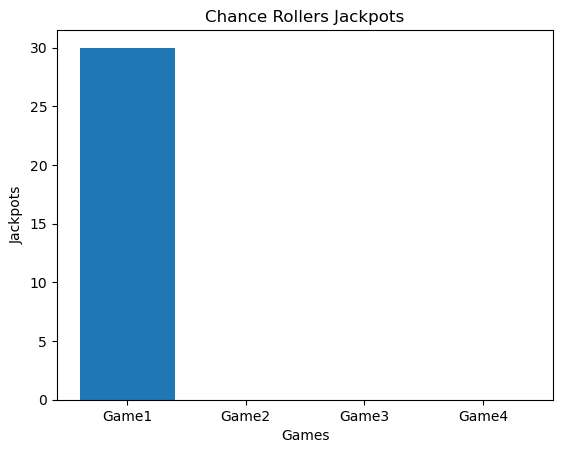

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# The Die
DieOne: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
DieTwo: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
DieThree: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)

dieOneInstance: Die = Die(DieOne)
dieTwoInstance: Die = Die(DieTwo)
dieThreeInstance: Die = Die(DieThree)

#Manage Die weighting
dieOneInstance.change_die_weight('B', .40)
dieTwoInstance.change_die_weight('B', .30)

diceList: list = [dieOneInstance, dieTwoInstance, dieThreeInstance]

gameOne: Game = Game(diceList)
gameTwo: Game = Game(diceList)
gameThree: Game = Game(diceList)
gameFour: Game = Game(diceList)

#Game on!
gameOne.play(1000)
gameTwo.play(1000)
gameThree.play(1000)
gameFour.play(1000)

gameOneAnalyzerInstance: Analyzer = Analyzer(gameOne)
gameTwoAnalyzerInstance: Analyzer = Analyzer(gameTwo)
gameThreeAnalyzerInstance: Analyzer = Analyzer(gameThree)
gameFourAnalyzerInstance: Analyzer = Analyzer(gameFour)

#Build Game Analyzer List
games: list = ['Game1', 'Game2', 'Game3', 'Game4']
print(f"Games List: {games}")

#Build Jackpot List
#print(f"Number of jackpots? \n{myAnalyzerInstance.jackpots()}")
jackpotsPerGame: list = [gameOneAnalyzerInstance.jackpots(), gameTwoAnalyzerInstance.jackpots(), gameThreeAnalyzerInstance.jackpots(), gameFourAnalyzerInstance.jackpots()]
print(f"Jackpots List: {jackpotsPerGame}")

plt.bar(games, jackpotsPerGame)
plt.title('Chance Rollers Jackpots')
plt.xlabel('Games')
plt.ylabel('Jackpots')
plt.show()


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

<class 'montecarlodie.game.Game'>
<class 'montecarlodie.game.Game'>
The DataFrame to examine for jackpot notifications: 
DieId    1  2
RollNum      
1        A  F
2        D  C
3        C  C
4        D  F
5        C  D
...     .. ..
996      E  E
997      C  F
998      E  A
999      C  D
1000     E  A

[1000 rows x 2 columns]
Number of jackpots Game 1? 
160
The DataFrame to examine for jackpot notifications: 
DieId    1  2
RollNum      
1        E  A
2        E  A
3        E  A
4        E  A
5        E  A
...     .. ..
996      E  A
997      E  A
998      E  A
999      E  A
1000     E  A

[1000 rows x 2 columns]
Number of jackpots Game 2? 
0
The DataFrame to examine for jackpot notifications: 
DieId    1  2
RollNum      
1        A  F
2        D  C
3        C  C
4        D  F
5        C  D
...     .. ..
996      E  E
997      C  F
998      E  A
999      C  D
1000     E  A

[1000 rows x 2 columns]
The DataFrame to examine for jackpot notifications: 
DieId    1  2
RollNum      
1        

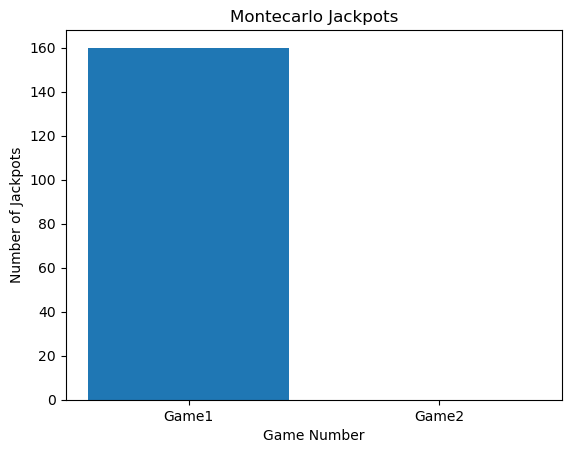

In [48]:
#Using the myInstance object from task 3
myAnalyzerInstance: Analyzer = Analyzer(myInstance)
myAnalyzerInstance2: Analyzer = Analyzer(myInstance2)

#Jackot Information
print(f"Number of jackpots Game 1? \n{myAnalyzerInstance.jackpots()}")
print(f"Number of jackpots Game 2? \n{myAnalyzerInstance2.jackpots()}")

#Build Game Analyzer List
games: list = ['Game1', 'Game2']

#Build Jackpot List
jackpotsPerGame: list = [myAnalyzerInstance.jackpots(), myAnalyzerInstance2.jackpots()]

plt.bar(games, jackpotsPerGame)
plt.title('Montecarlo Jackpots')
plt.xlabel('Game Number')
plt.ylabel('Number of Jackpots')
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [49]:
# The Die
DieOne: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
DieTwo: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
DieThree: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)

dieOneInstance: Die = Die(DieOne)
dieTwoInstance: Die = Die(DieTwo)
dieThreeInstance: Die = Die(DieThree)

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [50]:
#Manage Die weighting
dieOneInstance.change_die_weight('F', .83)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [51]:
#Manage Die weight
dieTwoInstance.change_die_weight('A', .83)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [52]:
# The Die
DieOne: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
DieTwo: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
DieThree: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
DieFour: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
DieFive: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)

dieOneInstance: Die = Die(DieOne)
dieTwoInstance: Die = Die(DieTwo)
dieThreeInstance: Die = Die(DieThree)
dieFourInstance: Die = Die(DieFour)
dieFiveInstance: Die = Die(DieFive)

diceList: list = [dieOneInstance, dieTwoInstance, dieThreeInstance, dieFourInstance, dieFiveInstance]
myGameOneInstance: Game = Game(diceList)

#Let it roll!
myGameOneInstance.play(10000)

Entering method play: Number of requested rolls (10000)

Number of Die in play: 5


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [53]:
# The Die
DieOne: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
DieTwo: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
DieThree: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
DieFour: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)
DieFive: np.array = np.array(['A', 'B', 'C', 'D', 'E', 'F'], dtype=str)

dieOneInstance: Die = Die(DieOne)
dieTwoInstance: Die = Die(DieTwo)
dieThreeInstance: Die = Die(DieThree)
dieFourInstance: Die = Die(DieFour)
dieFiveInstance: Die = Die(DieFive)

#Manage Die weighting
dieOneInstance.change_die_weight('F', .83)
dieTwoInstance.change_die_weight('A', .83)

diceList: list = [dieOneInstance, dieTwoInstance, dieThreeInstance, dieFourInstance, dieFiveInstance]
myGameTwoInstance: Game = Game(diceList)

#Let it roll!
myGameTwoInstance.play(10000)

Entering method play: Number of requested rolls (10000)

Number of Die in play: 5


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

<class 'montecarlodie.game.Game'>
<class 'montecarlodie.game.Game'>
Games List: ['Game1', 'Game2']
The DataFrame to examine for jackpot notifications: 
DieId    1  2  3  4  5
RollNum               
1        B  F  E  A  F
2        E  D  B  E  B
3        A  D  A  E  F
4        A  A  A  E  D
5        C  C  A  F  F
...     .. .. .. .. ..
9996     C  E  E  F  C
9997     E  E  D  C  B
9998     D  D  B  D  F
9999     C  B  F  B  B
10000    C  A  A  E  C

[10000 rows x 5 columns]
The DataFrame to examine for jackpot notifications: 
DieId    1  2  3  4  5
RollNum               
1        E  A  B  D  D
2        C  D  C  E  C
3        F  C  F  D  E
4        F  A  E  B  D
5        F  F  C  E  E
...     .. .. .. .. ..
9996     A  F  F  E  C
9997     F  B  A  D  F
9998     A  A  A  D  B
9999     E  E  C  D  B
10000    E  F  C  D  E

[10000 rows x 5 columns]
Jackpots List: [9, 12]


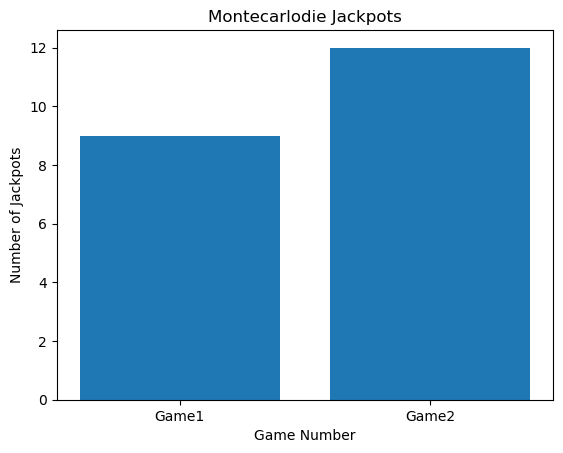

In [54]:
gameOneAnalyzerInstance: Analyzer = Analyzer(myGameOneInstance)
gameTwoAnalyzerInstance: Analyzer = Analyzer(myGameTwoInstance)

#Build Game Analyzer List
games: list = ['Game1', 'Game2']
print(f"Games List: {games}")
#Build Jackpot List
#print(f"Number of jackpots? \n{myAnalyzerInstance.jackpots()}")
jackpotsPerGame: list = [gameOneAnalyzerInstance.jackpots(), gameTwoAnalyzerInstance.jackpots()]
print(f"Jackpots List: {jackpotsPerGame}")

plt.bar(games, jackpotsPerGame)
plt.title('Montecarlodie Jackpots')
plt.xlabel('Game Number')
plt.ylabel('Number of Jackpots')
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [55]:
import pandas as pd
df = pd.read_table("english_letters.txt", sep=" ", header=None)

#Add New Column Called Frequency Weights
df['Weights'] = df[1] / df[1].sum()

#Set Column names
df.columns = ['Face', 'Frequency', 'Weight']

alphabetDie: np.array = np.array(df['Face'].to_list(), dtype=str)

alphabetDieInstance: Die = Die(alphabetDie)

#Set alphabetDie weighting for die
for row in df.itertuples():
    alphabetDieInstance.change_die_weight(row.Face, row.Weight)


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [56]:
#Build three (3) more Alphabet Die

alphabetDie2: np.array = np.array(df['Face'].to_list(), dtype=str)
alphabetDie3: np.array = np.array(df['Face'].to_list(), dtype=str)
alphabetDie4: np.array = np.array(df['Face'].to_list(), dtype=str)

alphabetDie2Instance: Die = Die(alphabetDie2)
alphabetDie3Instance: Die = Die(alphabetDie3)
alphabetDie4Instance: Die = Die(alphabetDie4)

#Set alphabetDie weighting for the three die
for row2 in df.itertuples():
    #print(f"Row Index: {row2.Index}")
    #print(f"Type: {type(row2)}")
    #print(f"Length: {len(row2)}")
    #print(f"Face: {row2.Face} - Frequency: {row2.Frequency} - Weight: {row.Weight}")
    alphabetDie2Instance.change_die_weight(row2.Face, row2.Weight)
    alphabetDie3Instance.change_die_weight(row2.Face, row2.Weight)
    alphabetDie4Instance.change_die_weight(row2.Face, row2.Weight)

alphabetDieList: list = [alphabetDieInstance, alphabetDie2Instance, alphabetDie3Instance, alphabetDie4Instance]
myAlphabetLtrGameInstance: Game = Game(alphabetDieList)

#Let it roll!
myAlphabetLtrGameInstance.play(1000)

Entering method play: Number of requested rolls (1000)

Number of Die in play: 4


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [57]:
alphabetAnalyzerInstance: Analyzer = Analyzer(myAlphabetLtrGameInstance)
print(f"Play Results(Wide Format): \n{alphabetAnalyzerInstance.diePermutationCounter()}")

<class 'montecarlodie.game.Game'>
Play Results(Wide Format): 
         Frequency
1 2 3 4           
A A A C          1
    C T          1
    N G          1
      T          1
    V T          1
...            ...
Y L L I          1
  N A I          1
    T A          1
  R D S          1
  W S V          1

[987 rows x 1 columns]


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [58]:
alphabetDie2: np.array = np.array(df['Face'].to_list(), dtype=str)
alphabetDie3: np.array = np.array(df['Face'].to_list(), dtype=str)
alphabetDie4: np.array = np.array(df['Face'].to_list(), dtype=str)
alphabetDie5: np.array = np.array(df['Face'].to_list(), dtype=str)

alphabetDie2Instance: Die = Die(alphabetDie2)
alphabetDie3Instance: Die = Die(alphabetDie3)
alphabetDie4Instance: Die = Die(alphabetDie4)
alphabetDie5Instance: Die = Die(alphabetDie5)

#Set alphabetDie weighting for the three die
for row2 in df.itertuples():
   
    alphabetDie2Instance.change_die_weight(row2.Face, row2.Weight)
    alphabetDie3Instance.change_die_weight(row2.Face, row2.Weight)
    alphabetDie4Instance.change_die_weight(row2.Face, row2.Weight)
    alphabetDie5Instance.change_die_weight(row2.Face, row2.Weight)

alphabetDieList: list = [alphabetDieInstance, alphabetDie2Instance, alphabetDie3Instance, alphabetDie4Instance, alphabetDie5Instance]
myAlphabetLtrGameInstance: Game = Game(alphabetDieList)

#Let it roll!
myAlphabetLtrGameInstance.play(1000)

Entering method play: Number of requested rolls (1000)

Number of Die in play: 5


In [59]:
alphabetAnalyzerInstance: Analyzer = Analyzer(myAlphabetLtrGameInstance)
dfPermResults: pd.DataFrame = alphabetAnalyzerInstance.diePermutationCounter()
print(f"Play Results(Wide Format): \n{dfPermResults}")

<class 'montecarlodie.game.Game'>
Play Results(Wide Format): 
           Frequency
1 2 3 4 5           
A A A H C          1
      R L          1
      S T          1
      U A          1
        O          1
...              ...
  Y T A E          1
        L          1
    W S I          1
    Y B G          1
  Z T I A          1

[994 rows x 1 columns]


In [60]:
df_ScrabbleText = pd.read_table("scrabble_words.txt", sep=" ", header=None)
df_ScrabbleText.columns = ['Text']
print(df_ScrabbleText)

            Text
0             AA
1            AAH
2          AAHED
3         AAHING
4           AAHS
...          ...
279491   ZYTHUMS
279492   ZYZZYVA
279493  ZYZZYVAS
279494       ZZZ
279495      ZZZS

[279496 rows x 1 columns]


In [61]:
# convert the rows of characters to a five character word
theList: list = []
separator=""
for rowWord in dfPermResults.itertuples():
    theList.append(separator.join(rowWord.Index))

In [64]:
#How many actual words are matcged in the scrabble dataframe?
counter: int = 0
for item in theList:
    if (df_ScrabbleText['Text'].eq(item)).any() == True:
        print(f"We have a match on: {item}")
        counter+=1
print(f"The number of matched words are: {counter}")

We have a match on: ADHAN
We have a match on: AEDES
We have a match on: AGORA
We have a match on: AILED
We have a match on: AIRNS
We have a match on: ALOHA
We have a match on: ANTAS
We have a match on: ANTRE
We have a match on: ARRET
We have a match on: ARUMS
We have a match on: ASHET
We have a match on: AWARE
The number of matched words are: 12
